In [5]:
words = open('names.txt','r').read().splitlines()


In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [7]:
sorted(b.items(),key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [2]:
import torch

In [8]:
N = torch.zeros((27,27),dtype = torch.int32)

In [13]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

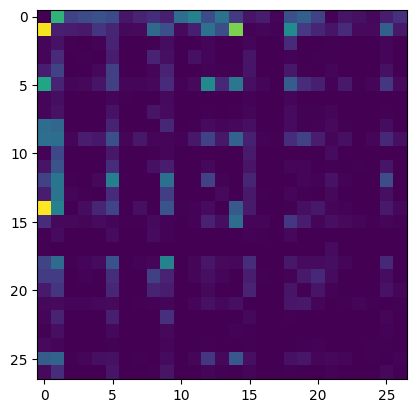

In [11]:
import matplotlib.pyplot as plt
plt.imshow(N)

In [32]:
P = (N+1).float()
P /= P.sum(1,keepdim = True)



In [23]:
P[0].sum()

tensor(1.)

In [25]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement = True,generator =g).item()
        
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin


loss:

In [34]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1

nll = -log_likelihood
print(f"{log_likelihood=}")
print(f"{nll=}")
print(f"{nll/n}")



log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


Neural Net approch

create a trainign set of bigrams


In [56]:
import torch.nn.functional as F

In [92]:
xs,ys = [],[]

for w in words:
    chs =['.'] +list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num


228146

initializing network

In [121]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator= g,requires_grad = True)

gradient descent

In [122]:
for k in range(100):
    xenc= F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims = True)  #softmax

    loss = -probs[torch.arange(num),ys].log().mean() + 0.1 * (W**2).mean()
    print(loss.item())

    W.grad = None #grad set to zero
    loss.backward()

    W.data += -50 * W.grad






3.855604887008667
3.4460108280181885
3.220778465270996
3.083400011062622
2.989140272140503
2.921293258666992
2.8705761432647705
2.8312132358551025
2.7996912002563477
2.773834705352783
2.7522473335266113
2.7339911460876465
2.718406915664673
2.7050065994262695
2.6934142112731934
2.68333101272583
2.6745150089263916
2.6667683124542236
2.6599278450012207
2.653859853744507
2.6484532356262207
2.643615961074829
2.639270782470703
2.6353538036346436
2.631810426712036
2.6285955905914307
2.6256704330444336
2.623002052307129
2.620562791824341
2.618328094482422
2.616276502609253
2.614389181137085
2.6126506328582764
2.611046314239502
2.6095638275146484
2.608191967010498
2.6069202423095703
2.605740785598755
2.604644298553467
2.603623867034912
2.6026737689971924
2.601787567138672
2.6009604930877686
2.6001875400543213
2.599463939666748
2.5987868309020996
2.598151683807373
2.59755539894104
2.5969958305358887
2.5964694023132324
2.595974922180176
2.595508337020874
2.595069169998169
2.5946547985076904
2.594

In [123]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ W
        counts =logits.exp()
        p = counts/counts.sum(1,keepdims= True)

        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix ==0:
            break
    print(''.join(out))


mor.
axx.
minaynnnyles.
koneraisah.
andhunizarie.
